# EDA and Pre-processing : Titanic Dataset

# Step 1: Import relevant libraries and dataset

In [ ]:
# importing relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the dataset  ==> from my google drive

from google.colab import drive

# mount Google drive
drive.mount('/content/drive')  #directory path to Google drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML datasets/titanic.csv')

# Step 2: Understanding the data

In [ ]:
# how many rows and cols are present? ==> shape
df.shape
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

df.shape

Number of rows:  891
Number of columns:  12


(891, 12)

In [ ]:
#what are the names of col?  ==> data.columns  (in the form of a list , all the column names will be printed)

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# check out the first few and last few rows.

# first few rows ==> df.head(3)
df.head()   # 5 rows by default

# last few rows ==> df.tail() ... we can see the last 5 rows as default

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# what are the dtypes of the columns? Identify the numerical and categorical columns
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
# what is the general information regarding the dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# what are the statistics of the numerical col?
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# what are the statistics of the categoical col?
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
# are there any missing values in the data? deal with them

# check if there are missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# how many missing values:

# Age (numeric) : 177 / 891    ==> mean()
# Cabin : 687 / 891 ==> drop
# Embarked (categorical) : 2 / 891  ==> mode()

How do we treat missing values?

1. remove rows/col with missing value (>50% is missing)
2. Fill the missing values with a particular value
  - mean (numeric col)
  - median (to fill numeric column which are right skewed)
  - mode (to fill categorical column)

In [ ]:
# fill ['Age'] with mean

# df['Age'] = df['Age'].fillna(df['Age'].mean(),inplace=True)

# New pandas 3 update: df.method({col: value}, inplace=True)
df.fillna({'Age': df['Age'].mean()},inplace=True)

# fill ['embarked'] with mode :   Fill the missing values with  col_name.mode()[0]
df.fillna({'Embarked':df['Embarked'].mode()[0]},inplace=True)


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# are there any duplicates in the data? deal with them
df.duplicated().sum()

0

# Step 3:  Data Visualization

What is the data trying to tell us?

##Univariate Analysis
- Analysing one column at a a time
- Numerical column : histogram
- Categorical column: countplot

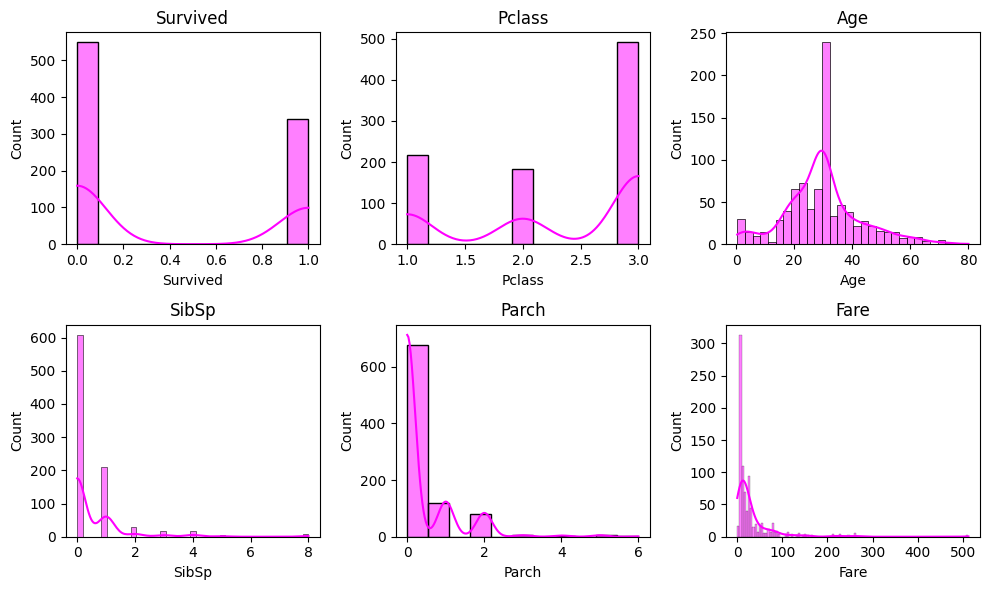

In [ ]:
# histograms of all numerical columns

num_col = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# create a 2x3 subplot grid to display the histogram of numeric column
fig, axes = plt.subplots(2,3,figsize=(10,6))

# plot each numeric column
for i, column in enumerate(num_col):
  row,col = divmod(i,3)  # calculate row number
  sns.histplot(data=df, x = column,  kde= True, ax = axes[row][col], color='magenta')
  axes[row][col].set_title(column)

plt.tight_layout()
plt.show()

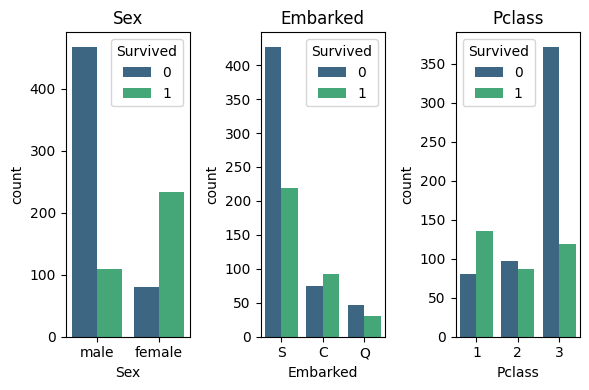

In [ ]:
# countplots for object dtype - categorical columns

cat_col = ['Sex','Embarked', 'Pclass']

# create a 1x2 subplot grid
fig,axes = plt.subplots(1,3,figsize=(6,4))

# plot each categorical column
for i, column in enumerate(cat_col):
  sns.countplot(data=df, x= column, ax = axes[i], palette = 'viridis', hue='Survived')
  axes[i].set_title(column)

plt.tight_layout()
plt.show()

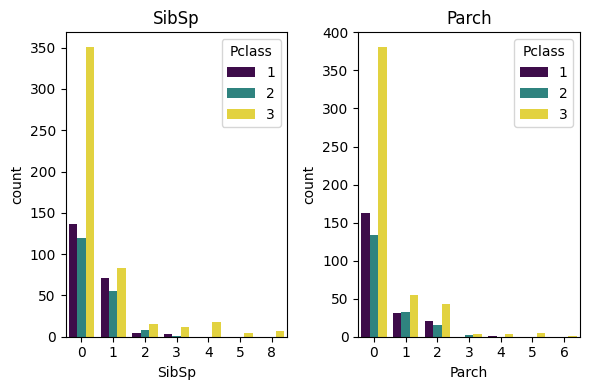

In [ ]:
cat_col = ['SibSp', 'Parch']

# create a 1x2 subplot grid
fig,axes = plt.subplots(1,2,figsize=(6,4))

# plot each categorical column
for i, column in enumerate(cat_col):
  sns.countplot(data=df, x= column, ax = axes[i], palette = 'viridis', hue='Pclass')
  axes[i].set_title(column)

plt.tight_layout()
plt.show()

## Bivariate Analysis

- Analysing 2 columns at a time.
  * Num VS Num : Scatterplot
  * Num VS Categorical  : boxplot, barplot, violinplot
  * Categorical VS Categorical : countplot(stacked),  heatmap



<Axes: xlabel='Pclass', ylabel='Fare'>

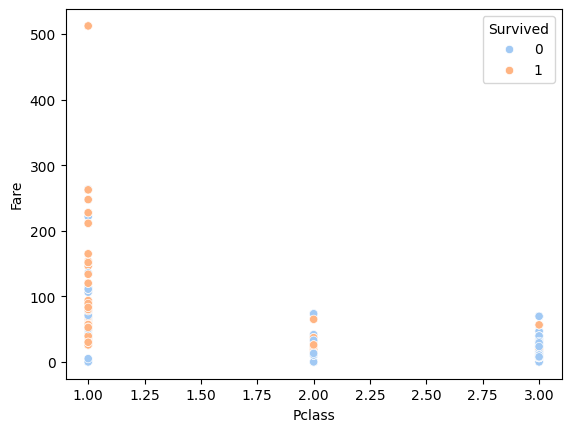

In [ ]:
# Was the Fare different for different Pclass

# col1 : 'Pclass'    col2: 'Fare'   ==> are numeric  ==> visualize using scatterplot

sns.scatterplot(data=df, x='Pclass',y='Fare', hue='Survived', palette='pastel')

<Axes: xlabel='Pclass', ylabel='Age'>

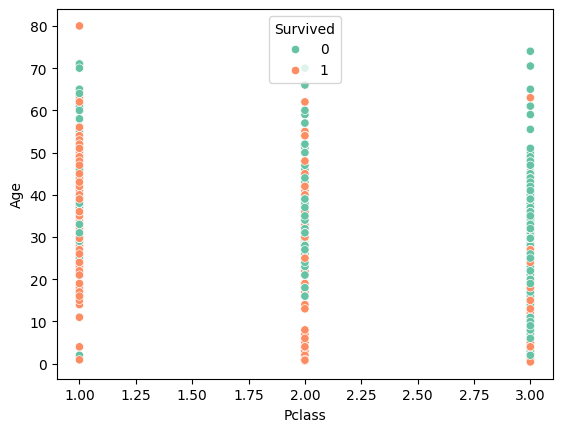

In [ ]:
# # Was the Pclass Age specific

# Pclass ==> numeric    Age: numeric :   ==> scatterplot
sns.scatterplot(data = df, x = 'Pclass', y = 'Age', palette='Set2', hue='Survived')

<Axes: xlabel='Pclass', ylabel='Fare'>

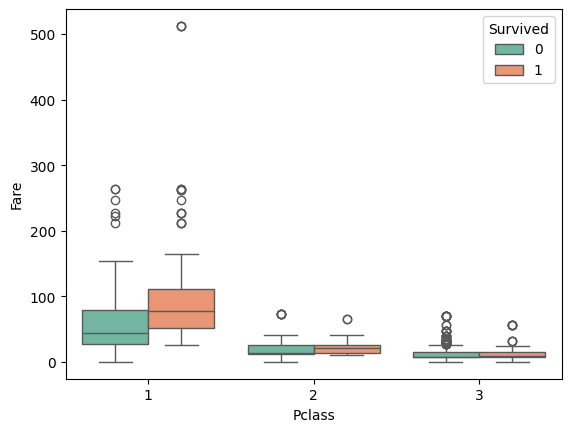

In [ ]:
# num VS Cat
# Fare   Pclass

sns.boxplot(data=df,x='Pclass',y='Fare', hue='Survived', palette='Set2')

## Multivariate Analysis
  
  * understanding relationship between 3 or more columns
  * Heatmap (using correlation matrix) : numerical columns
  * 3d scatter plots
  * pairplots

<Axes: >

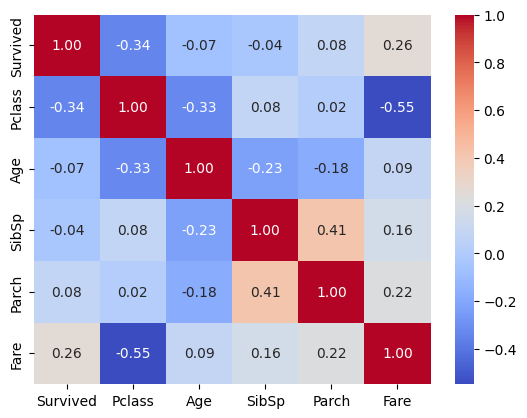

In [ ]:
# numeric columns ==> extract their correlation matrix ===> plot the results on a heatmap

# what is correlation matrix: measures the linear relationship between the numeric columns based on strength and direction

# correlation value: ranges from -1 to 1
#  -1:  strong -ve correlation (-0.8  to -1)
#   0: no correlation
#   1 : strong +ve correlation  (0.8 to 1)

num_col = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# compute correlation matrix
corr_matrix = df[num_col].corr()  #calculates correlation

# plot heatmap
sns.heatmap(corr_matrix,annot=True, fmt='.2f',cmap='coolwarm')

<Axes: xlabel='Embarked', ylabel='Pclass'>

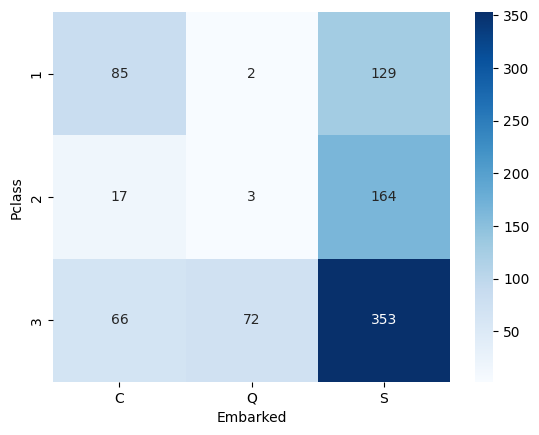

In [ ]:
# heatmap for categorical data: ==> cross-tabulation
cross_tab = pd.crosstab(df['Pclass'],df['Embarked'])\

sns.heatmap(cross_tab,annot=True,cmap='Blues',fmt='d')

#Step 4: Removing Irrelevant columns and Checking for Outliers





In [ ]:
# remove irrelevant columns  : do not add any useful information for analysis

# passengerID
# Name
# Cabin
# ticket

irr_col = ['PassengerId','Name','Cabin','Ticket']

df = df.drop(columns=irr_col)

df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<Axes: xlabel='Fare', ylabel='Count'>

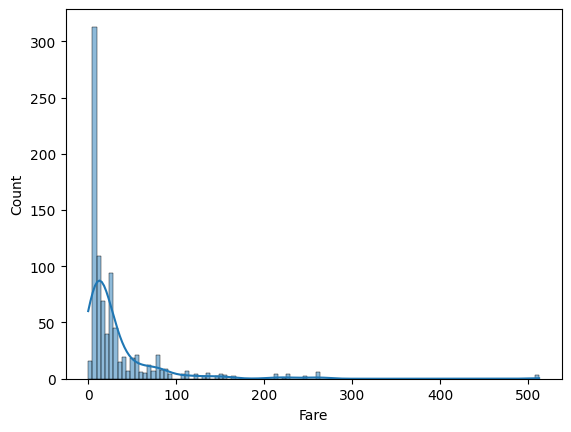

In [ ]:
# Method 1 : IQR  (not normal distribution)

# Method 2: Log transformation  (for highly right skewed data)

# right skewed data

sns.histplot(data=df,x='Fare',kde=True)

<Axes: xlabel='Fare_log', ylabel='Count'>

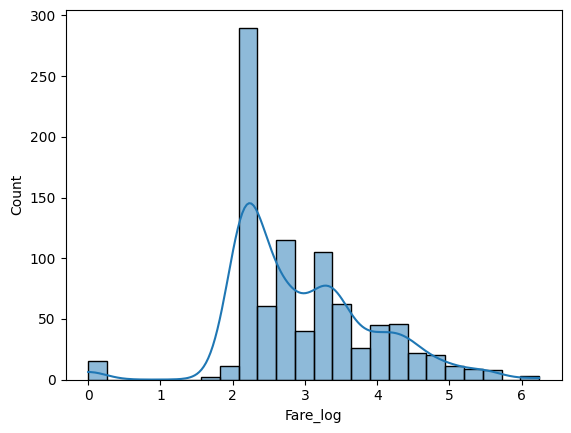

In [ ]:
# apply log transformation on to the 'Fare'

import numpy as np

df['Fare_log'] = np.log1p(df['Fare'])   # # log(1+x) to handle 0 values

sns.histplot(data=df,x='Fare_log', kde= True)

# Step 5: Encoding categorical columns

### Categorical columns:

1. Nominal categories: independant categories.
    
    color =['red', 'green', 'red', 'blue']

2. Ordinal categories: hierarchy in categories

    size = [low', medium, large]

    

In [ ]:
# nominal categorical column :  One hot encoding

# df['Embarked']  ==> nominal categories : S, C and Q

embarked_enc = pd.get_dummies(df['Embarked'],prefix='Emb',dtype=int)

# concatenate back to the df
df = pd.concat([df,embarked_enc],axis=1)

#drop the original 'embarked' column
df.drop('Embarked',axis=1,inplace=True)

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fare_log,Emb_C,Emb_Q,Emb_S,Emb_C,Emb_Q,Emb_S
0,0,3,male,22.0,1,0,7.2500,2.110213,0,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,4.280593,1,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,2.188856,0,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,3.990834,0,0,1,0,0,1
4,0,3,male,35.0,0,0,8.0500,2.202765,0,0,1,0,0,1


In [ ]:
# ordinal categorical column:  label encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['col_encoded'] = encoder.fit_transform(df['col_name'])

In [ ]:
df['Sex_encoded'] = df['Sex'].map({'male':0,'female':1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fare_log,Emb_C,Emb_Q,Emb_S,Emb_C,Emb_Q,Emb_S,Sex_encoded
0,0,3,male,22.0,1,0,7.2500,2.110213,0,0,1,0,0,1,0
1,1,1,female,38.0,1,0,71.2833,4.280593,1,0,0,1,0,0,1
2,1,3,female,26.0,0,0,7.9250,2.188856,0,0,1,0,0,1,1
3,1,1,female,35.0,1,0,53.1000,3.990834,0,0,1,0,0,1,1
4,0,3,male,35.0,0,0,8.0500,2.202765,0,0,1,0,0,1,0


In [ ]:
df_cleaned = df[['Survived','Pclass','Age','Sex_encoded','SibSp','Parch','Fare_log','Emb_C','Emb_Q','Emb_S']]

df_cleaned.head()

,Survived,Pclass,Age,Sex_encoded,SibSp,Parch,Fare_log,Emb_C,Emb_C,Emb_Q,Emb_Q,Emb_S,Emb_S
0,0,3,22.0,0,1,0,2.110213,0,0,0,0,1,1
1,1,1,38.0,1,1,0,4.280593,1,1,0,0,0,0
2,1,3,26.0,1,0,0,2.188856,0,0,0,0,1,1
3,1,1,35.0,1,1,0,3.990834,0,0,0,0,1,1
4,0,3,35.0,0,0,0,2.202765,0,0,0,0,1,1


# Step 6: Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ["Age", "Fare_log"]
df_cleaned.loc[:,num_cols] = scaler.fit_transform(df_cleaned[num_cols])

# StandardScaler (for normal distributions) - Recommended for most ML models.
# MinMaxScaler (for non-normal distributions) - Maps values between 0 and 1.

In [ ]:
df_cleaned.head()

,Survived,Pclass,Age,Sex_encoded,SibSp,Parch,Fare_log,Emb_C,Emb_C,Emb_Q,Emb_Q,Emb_S,Emb_S
0,0,3,-0.592481,0,1,0,-0.879741,0,0,0,0,1,1
1,1,1,0.638789,1,1,0,1.361220,1,1,0,0,0,0
2,1,3,-0.284663,1,0,0,-0.798540,0,0,0,0,1,1
3,1,1,0.407926,1,1,0,1.062038,0,0,0,0,1,1
4,0,3,0.407926,0,0,0,-0.784179,0,0,0,0,1,1
